# 06/05 - Pair Programming EDA 3 - Guadalupe & Lara

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as sdt

📌 Nota: Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

In [22]:
df = pd.read_csv("ataques_enproceso.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)

# Ejercicio 1

Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [23]:
plt.rcParams["figure.figsize"] = (12,4)

# Ejercicio 2
- Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

In [24]:
df.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,N,Minor injury to left thigh,18-Jun-2018


- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.


👩🏽‍🦰👩🏽‍🦱💬

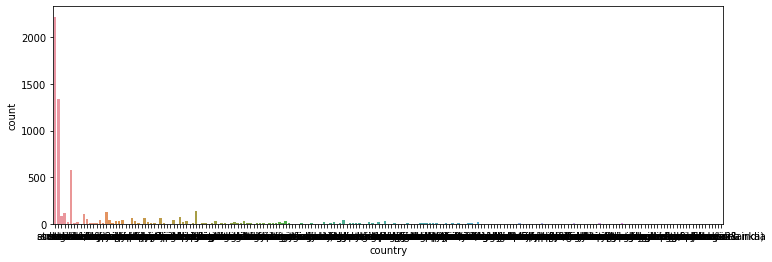

In [17]:
plt.figure()

sns.countplot(x = df["country"], data = df); 

plt.show()

Como podemos observar, se ve fatal la gráfica. Sacaremos sólo los 10 países con más ataques.

In [9]:
freq_country = df.stb.freq(["country"])[:10]
freq_country

,country,count,percent,cumulative_count,cumulative_percent
0,usa,2222,35.643247,2222,35.643247
1,australia,1335,21.414822,3557,57.058069
2,south africa,577,9.255695,4134,66.313763
3,papua new guinea,134,2.149503,4268,68.463266
4,new zealand,127,2.037215,4395,70.500481
5,brazil,112,1.796599,4507,72.297081
6,bahamas,109,1.748476,4616,74.045557
7,mexico,88,1.411614,4704,75.457170
8,italy,70,1.122875,4774,76.580045
9,fiji,65,1.042669,4839,77.622714


In [25]:
df_2 = df[df["country"].isin(freq_country["country"])]

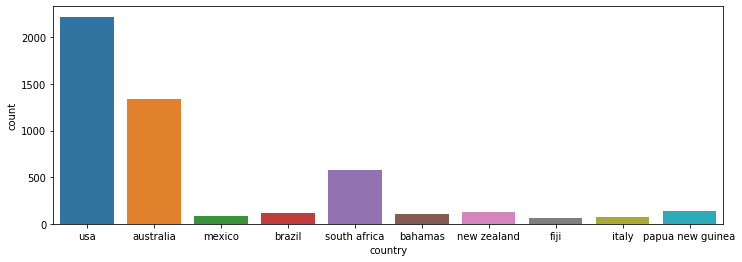

In [16]:
plt.figure()

sns.countplot(x = df_2["country"], data = df_2)

plt.show()

👩🏽‍🦰👩🏽‍🦱💬

In [ ]:
i = df_2.groupby("case_number")
fig = sns.swarmplot(x = "country", y = i, data = df_2)

#fig.set(xlabel='Isla', ylabel= 'Peso de los pingüinos por isla' ) fig.set_title('Diagrama de enjambre del peso de los pingüinos por isla') 

plt.show() 

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?


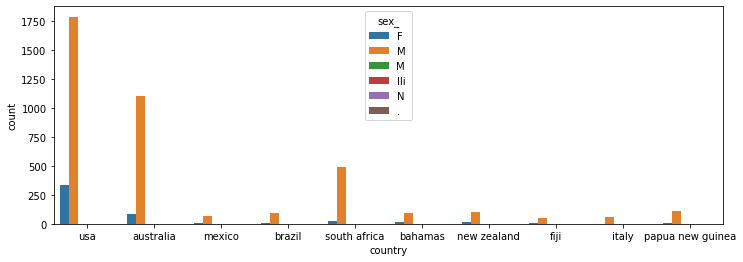

In [18]:
sns.countplot(x = df_2["country"], data = df_2, hue = "sex_")

plt.show()
#oops sex_ is not clean. (we mean the column)

👩🏽‍🦰👩🏽‍🦱💬

- ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.


In [ ]:
df_2["age"].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '34',
       '60', '33', '29', '41', '37', '56', '19', '25', '69', '38', '55',
       '35', '46', '14', '28', '20', '54', '7', '31', '17', '40', '3',
       '13', '8', '50', '16', '73', '20s', '68', '21', '51', '39', '58',
       '30', '26', '22', 'Teen', '47', '61', '65', '42', '36', '66', '43',
       '60s', '9', '49', '59', '6', '27', '64', '23', '45', '71', '44',
       '62', '63', '70', '24', '40s', '53', '50s', 'teen', '77', '74',
       '30s', '5', '86', '12 or 13', 'Teens', '36 & 26', '8 or 10', '84',
       '\xa0 ', '30 or 36', '6½', '75', '33 or 37', 'mid-30s', '23 & 20',
       ' 30', '7      &    31', ' 28', '20?', "60's", '16 to 18', '87',
       '67', 'Elderly', 'mid-20s', 'Ca. 33', ' ', '74 ', '45 ',
       '21 or 26', '>50', 'adult', '9 & 12', '? & 19', '9 months',
       '(adult)', '33 & 37', '25 or 28', '37, 67, 35, 27,  ? & 27',
       '30 & 32', '50 & 30', '17 & 35', '"middle-age"', '34 & 19',
       

In [20]:
#  🚒 # 🚒 PENDIENTES DE LIMPIAR LA COLUMNA AGE PORQUE SINO ESTO ES UN INFIERNO.  🚒 # 🚒 # 🚒 
df_2["age"] = df_2["age"].apply() 

TypeError: apply() missing 1 required positional argument: 'func'

In [ ]:
df_2["age_bins"] = pd.cut(df_2["age"], 3, labels = ["grupoA", "grupoB", "grupoC"])
df_2["age_bins"]

TypeError: '<=' not supported between instances of 'str' and 'float'

- Ataques entre sexos, ¿hay diferencia?


👩🏽‍🦰👩🏽‍🦱💬

In [ ]:
#hue = sex

- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

In [27]:
import regex as re
df_2.head()

def funcion(columna):
    patron= r"\b\w{3}\b"
    try:
        if re.findall(patron, columna):
            return patron 
        else:
            return "undefined"
    except:
            return "undefined"


df_2["mes"] = df_2["date"].apply(funcion)


ModuleNotFoundError: No module named 'regex'